<a href="https://colab.research.google.com/github/prateekkumaroriginal/heart_disease_classification/blob/main/01_heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting heart disease or not, using ML


1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation



# 1. Problem definition
Given clinical parameters about a patient, predict whether they have heart disease or not.

# 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

# 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

# 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

1. **age:** Age in years
2. **sex:** Gender (1 = male; 0 = female)
3. **cp:** Chest pain type
   - 0: Typical angina - Chest pain related to a decrease in blood supply to the heart
   - 1: Atypical angina - Chest pain not related to the heart
   - 2: Non-anginal pain - Typically esophageal spasms (non-heart-related)
   - 3: Asymptomatic - Chest pain not showing signs of disease
4. **trestbps:** Resting blood pressure (in mm Hg on admission to the hospital). Anything above 130-140 is typically a cause for concern.
5. **chol:** Serum cholesterol in mg/dL. Serum = LDL + HDL + 0.2 * triglycerides. Above 200 is a cause for concern.
6. **fbs:** Fasting blood sugar > 120 mg/dL (1 = true; 0 = false). '>126' mg/dL signals diabetes.
7. **restecg:** Resting electrocardiographic results
   - 0: Nothing to note
   - 1: ST-T Wave abnormality - Can range from mild symptoms to severe problems, signals non-normal heart beat
   - 2: Possible or definite left ventricular hypertrophy - Enlarged heart's main pumping chamber
8. **thalach:** Maximum heart rate achieved
9. **exang:** Exercise-induced angina (1 = yes; 0 = no)
10. **oldpeak:** ST depression induced by exercise relative to rest. Looks at stress of heart during exercise. An unhealthy heart will stress more.
11. **slope:** The slope of the peak exercise ST segment
    - 0: Upsloping - Better heart rate with exercise (uncommon)
    - 1: Flatsloping - Minimal change (typical healthy heart)
    - 2: Downsloping - Signs of an unhealthy heart
12. **ca:** Number of major vessels (0-3) colored by fluoroscopy. Colored vessels mean the doctor can see the blood passing through. The more blood movement, the better (no clots).
13. **thal:** Thallium stress result
    - 1, 3: Normal
    - 6: Fixed defect - Used to be a defect but okay now
    - 7: Reversible defect - No proper blood movement when exercising
14. **target:** Have disease or not (1 = yes, 0 = no) (= the predicted attribute)


In [1]:
# Import all tools

# EDA and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

# Load Data

In [2]:
data = pd.read_csv('/content/drive/MyDrive/AI/Learning/01_heart_disease_project/157 - heart-disease.csv')
data.shape

(303, 14)

# EDA and preprocessing
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

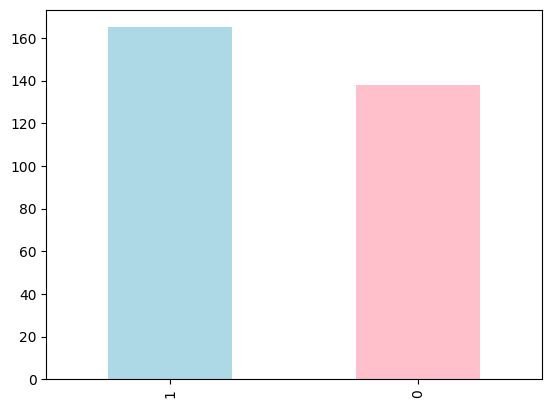

In [5]:
data.target.value_counts().plot(kind='bar', color=['lightblue', 'pink'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.isna().sum() # missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

([<matplotlib.axis.XTick at 0x7b124d85dff0>,
 [Text(0, 0, 'No Disease'), Text(1, 0, 'Disease')])

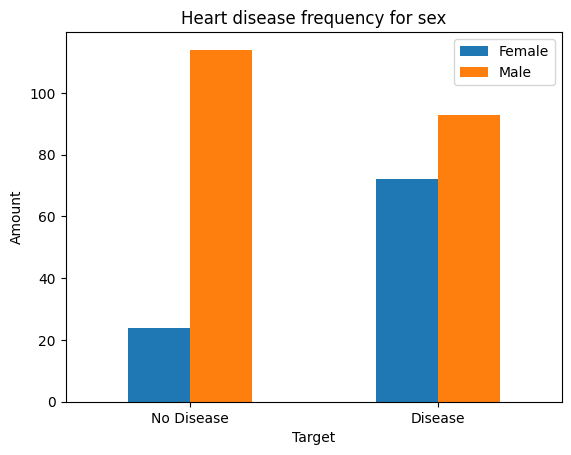

In [10]:
pd.crosstab(data.target, data.sex).plot(kind='bar')
plt.title('Heart disease frequency for sex')
plt.ylabel('Amount')
plt.xlabel('Target')
plt.legend(['Female', 'Male'])
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'], rotation=0)

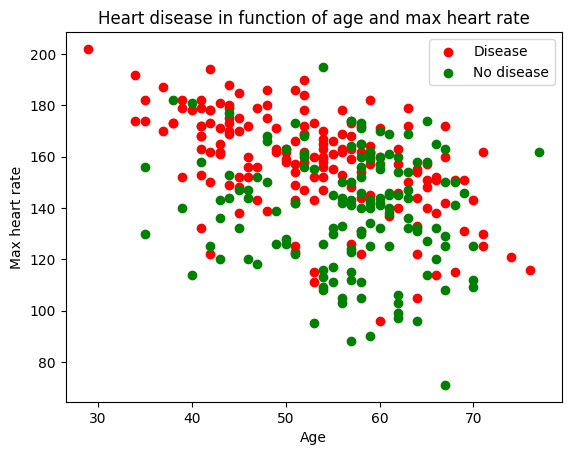

In [11]:
# Scatter with positive targets
plt.scatter(data.age[data.target==1], data.thalach[data.target==1], color='red')

# Scatter with positive targets
plt.scatter(data.age[data.target==0], data.thalach[data.target==0], color='green')

plt.title('Heart disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease', 'No disease'])

(<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>)

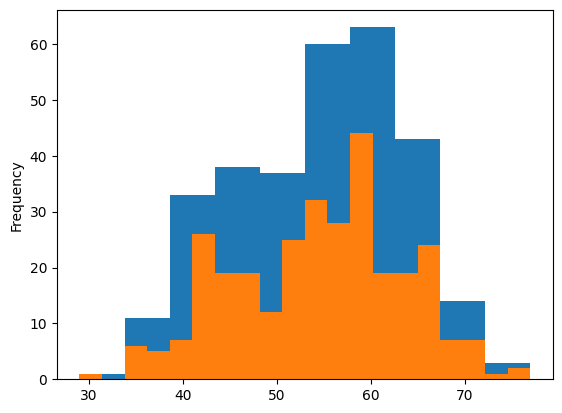

In [12]:
data.age.plot.hist(), data.age.plot.hist(bins=20)

In [13]:
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


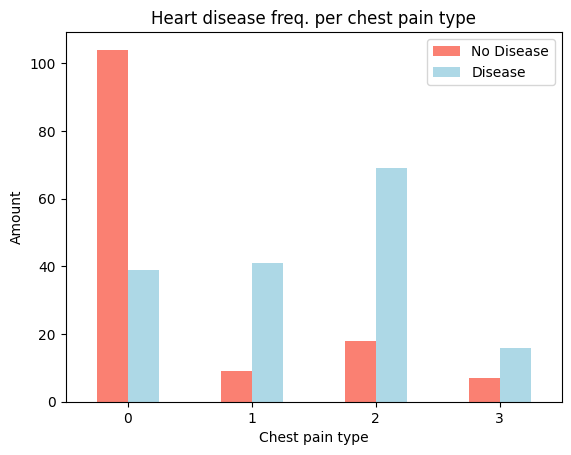

In [14]:
# make crosstab visual
pd.crosstab(data.cp, data.target).plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Heart disease freq. per chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['No Disease', 'Disease'])

In [15]:
# correlation matrix
corr_matrix = data.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


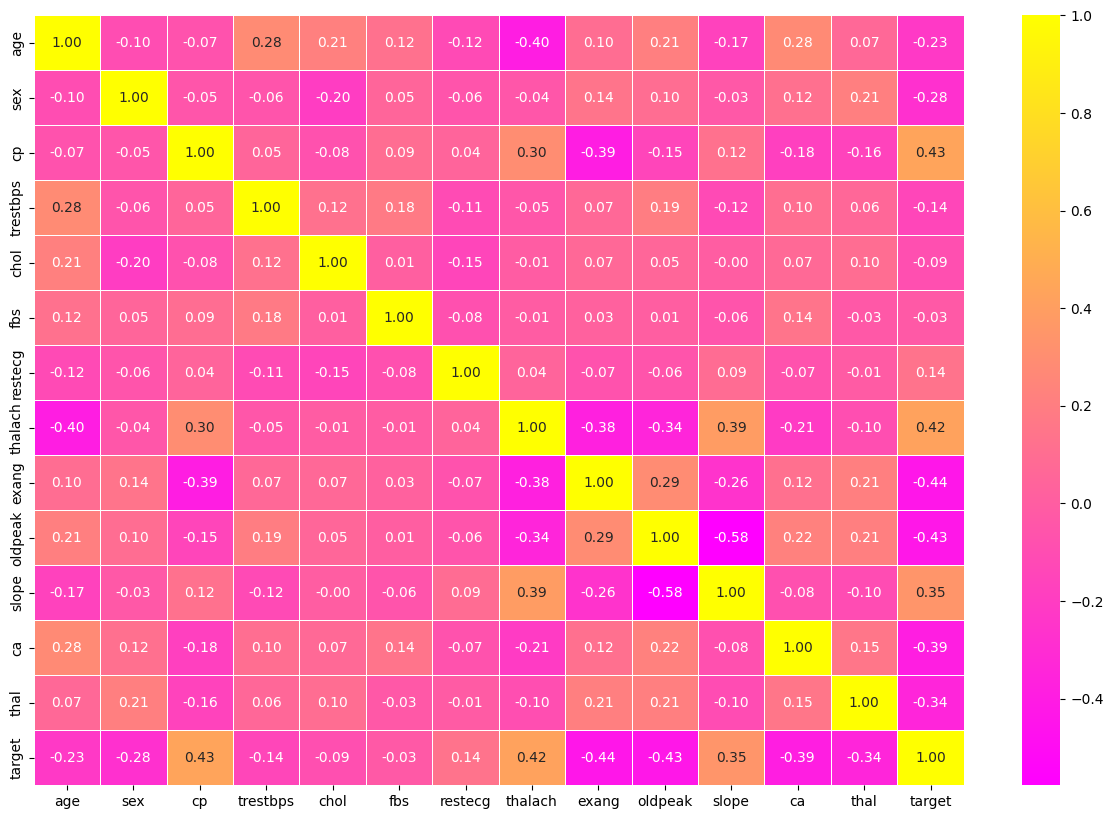

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="spring")

In [17]:
# Print out name of columns having correlation between -0.2 and 0.2 with the target
# Train other model by removing them later
less_corr_col = [col for col in data.columns if abs(data[col].corr(data['target'])) <= 0.2]
less_corr_col

['trestbps', 'chol', 'fbs', 'restecg']

In [18]:
!pip install fasteda

In [19]:
from fasteda import fast_eda

DataFrame Head:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


DataFrame Tail:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(303, 14)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), 

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
age,303,54.366,55,9.082,29,47.5,55,61,77,-0.201460,-0.552999
sex,303,0.683,1,0.466,0,0,1,1,1,-0.787412,-1.379982
cp,303,0.967,1,1.032,0,0,1,2,3,0.482329,-1.193211
trestbps,303,131.624,130,17.538,94,120,130,140,200,0.710230,0.894057
chol,303,246.264,240,51.831,126,211,240,274.5,564,1.137733,4.411682
fbs,303,0.149,0,0.356,0,0,0,0,1,1.976803,1.907752
restecg,303,0.528,1,0.526,0,0,1,1,2,0.161717,-1.360027
thalach,303,149.647,153,22.905,71,133.5,153,166,202,-0.534746,-0.080689
exang,303,0.327,0,0.47,0,0,0,1,1,0.738851,-1.454100
oldpeak,303,1.04,0.8,1.161,0,0,0.8,1.6,6.2,1.263426,1.530193


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



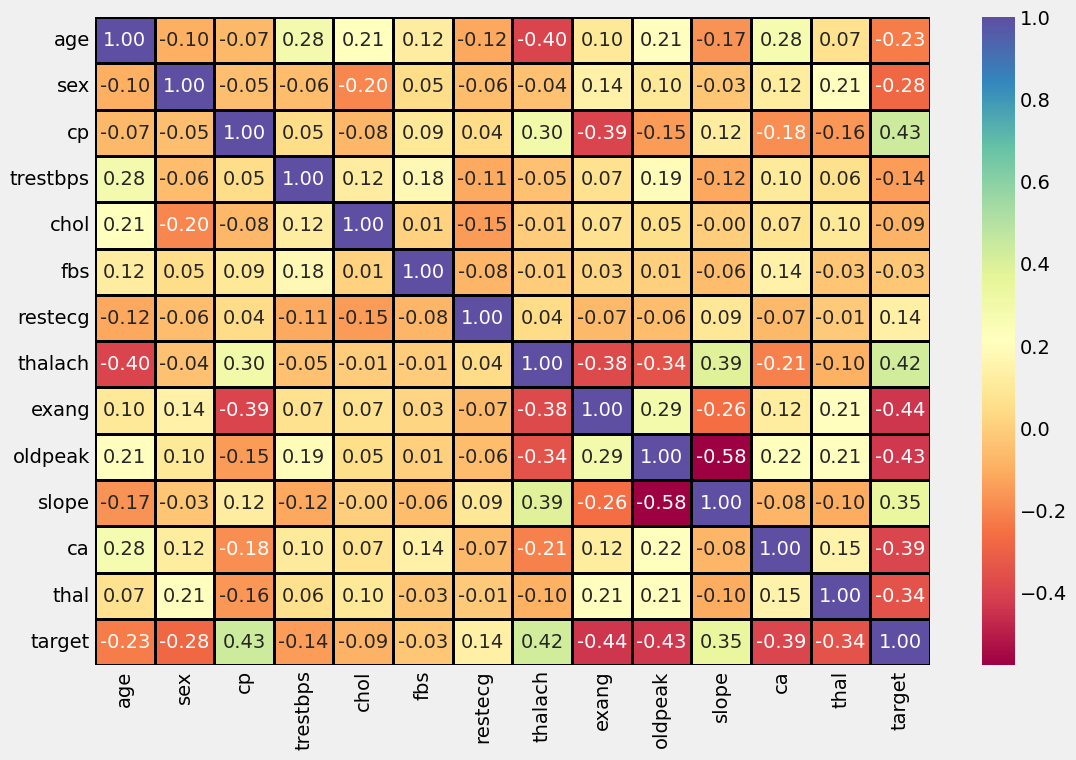

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



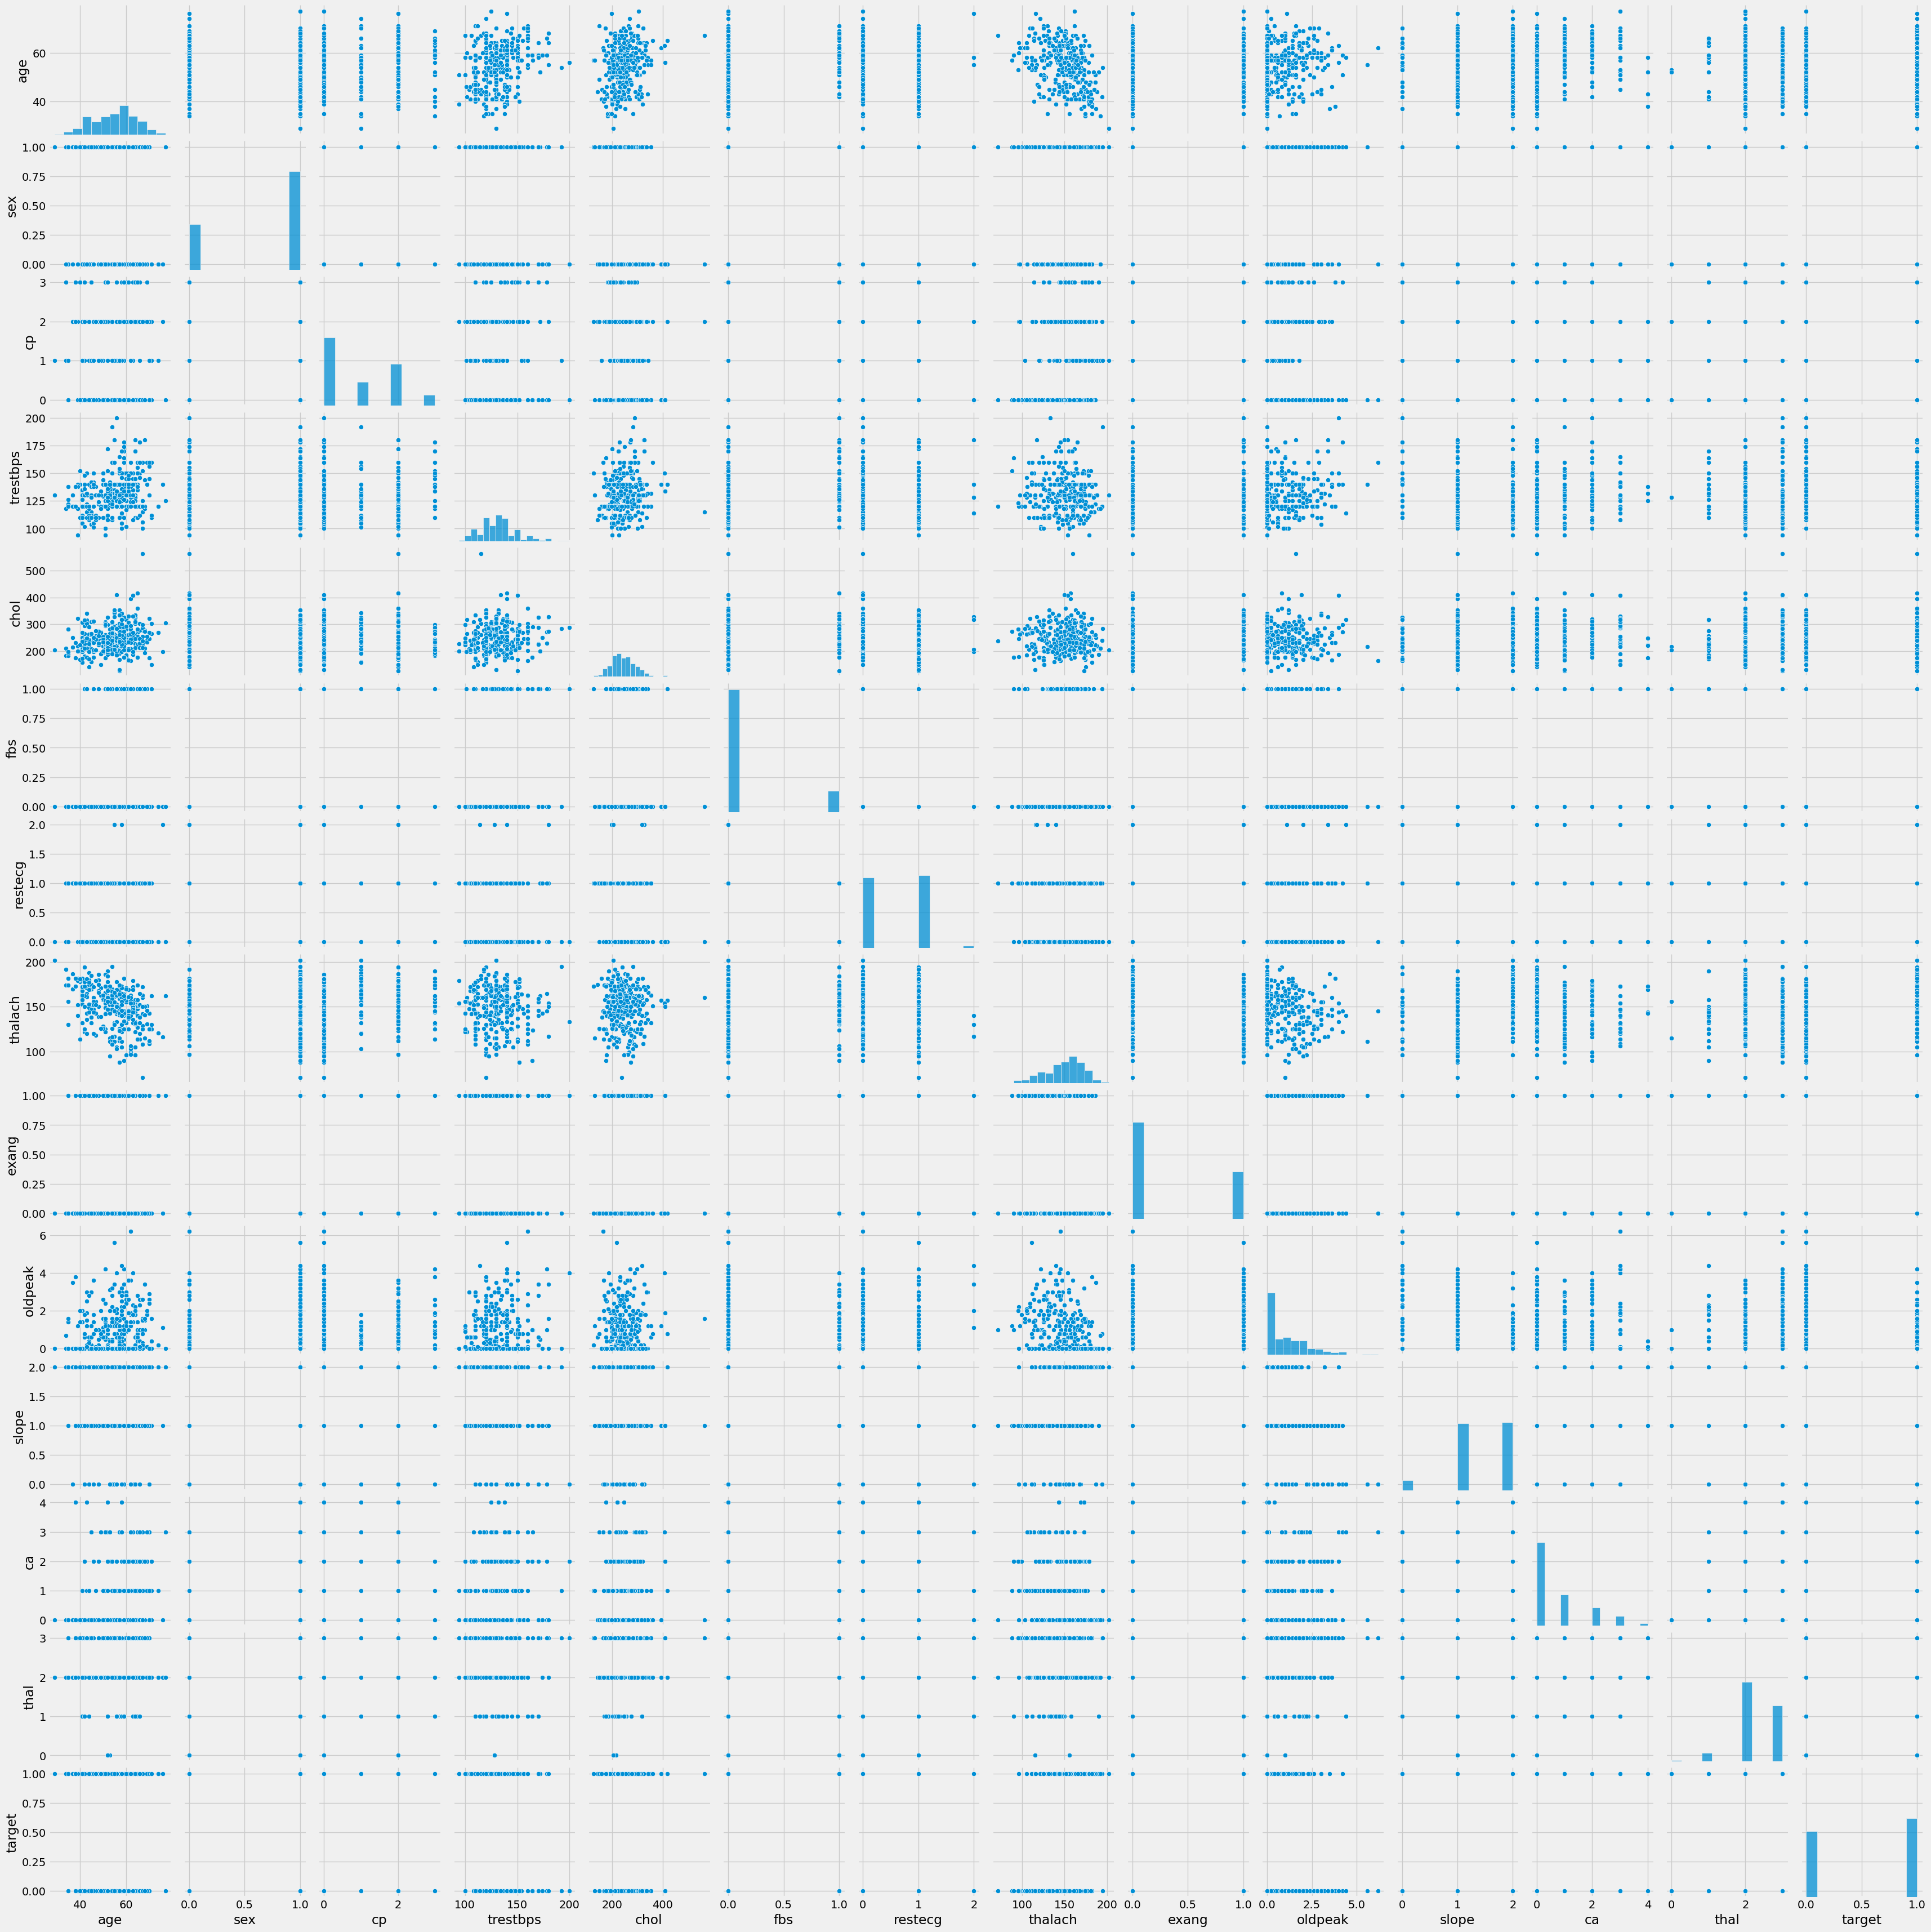

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



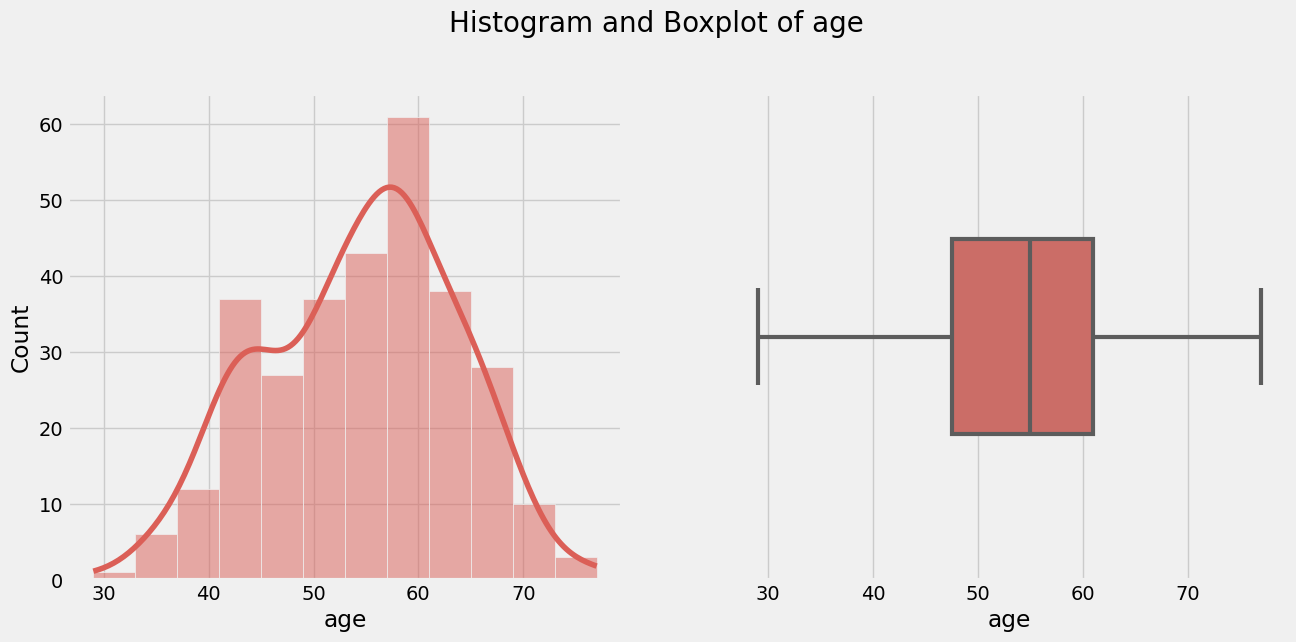

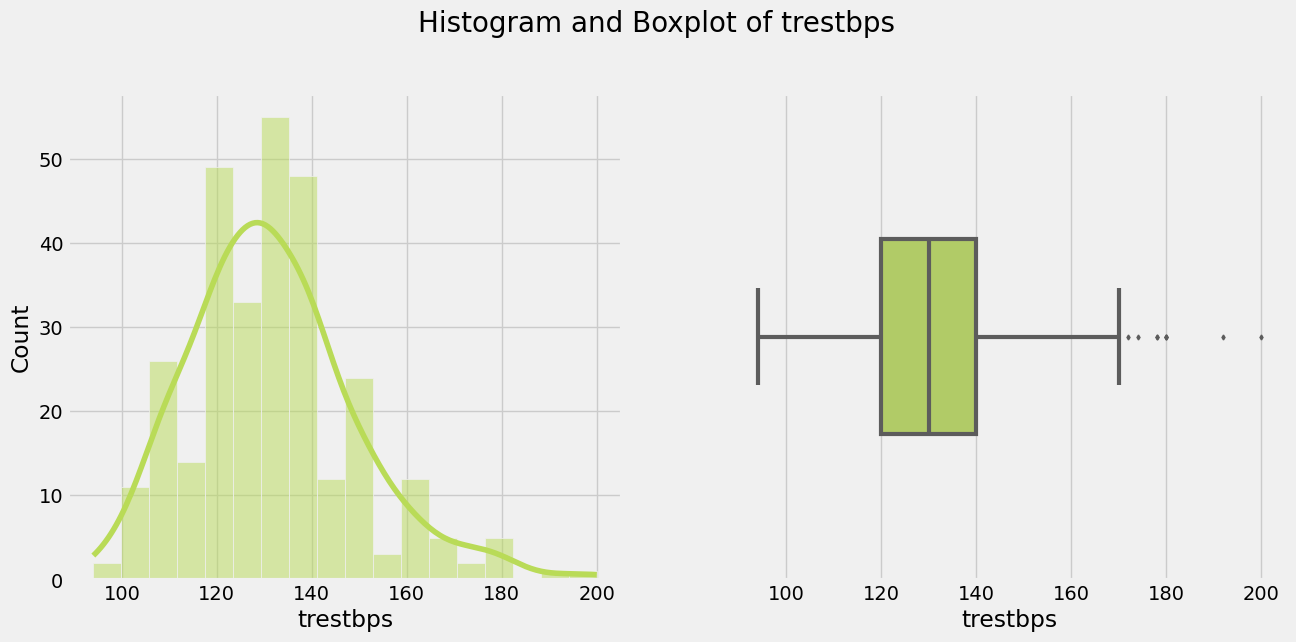

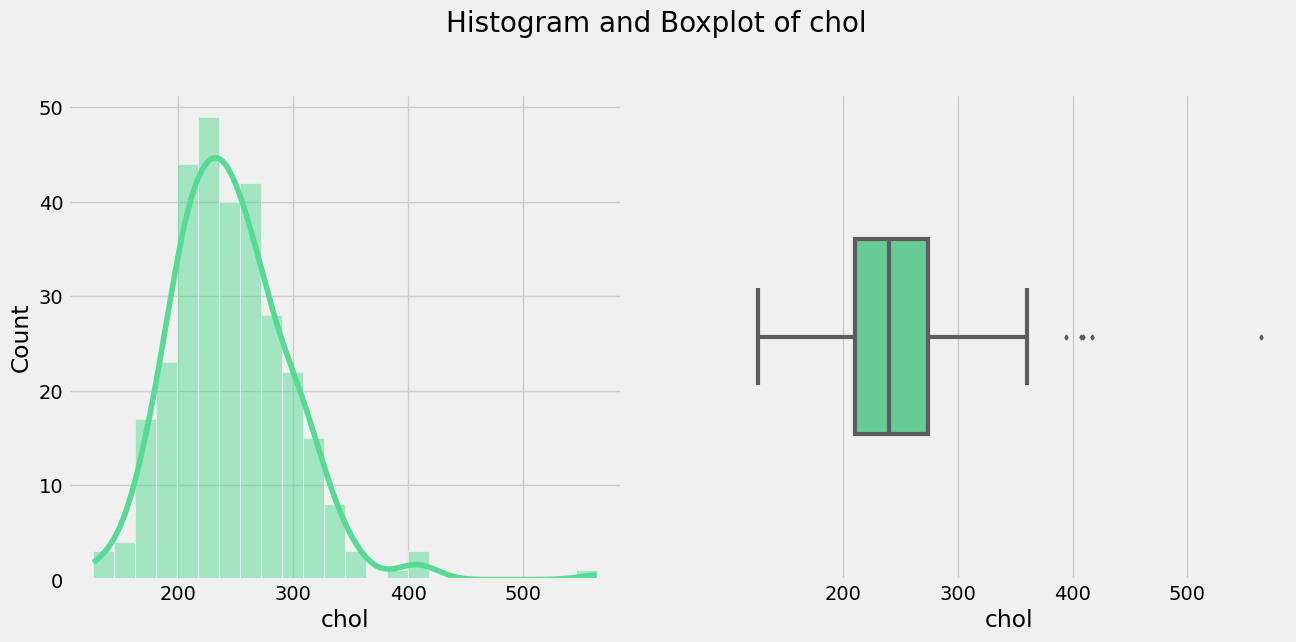

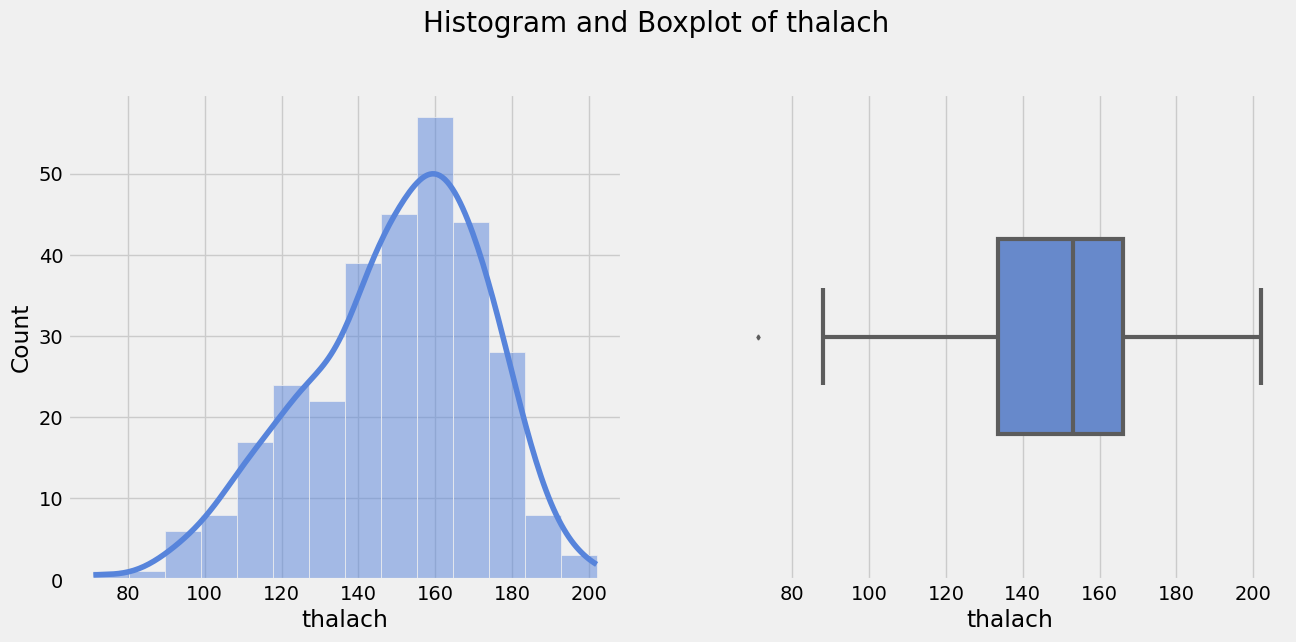

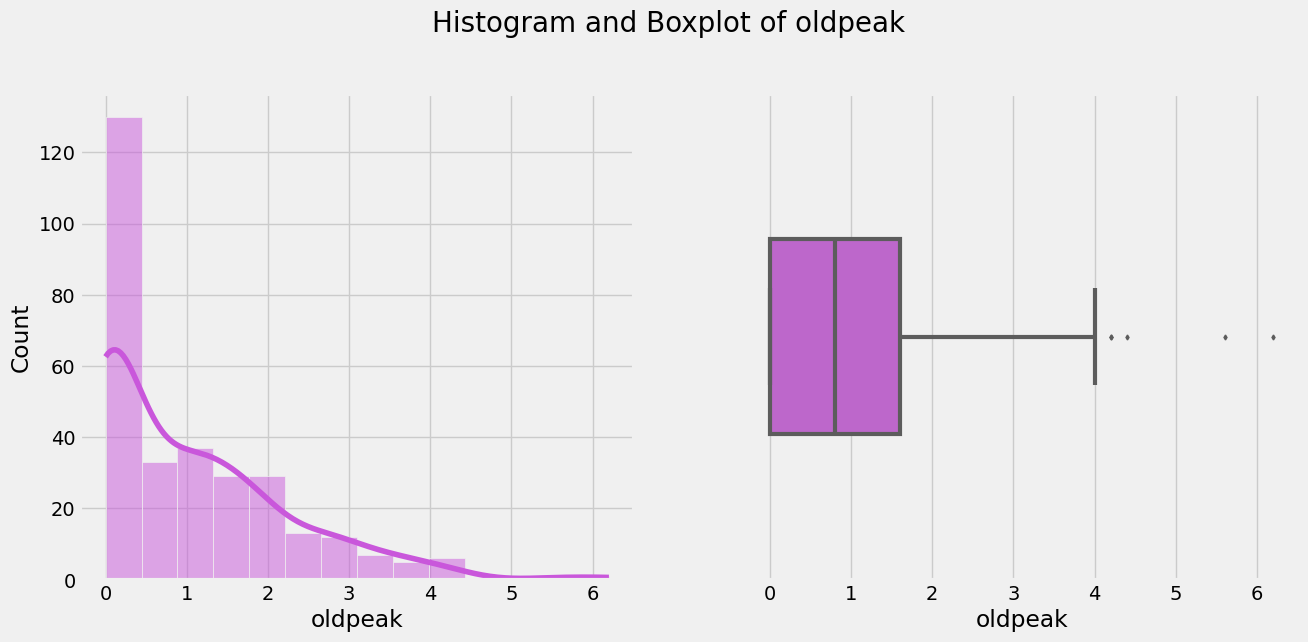

----------------------------------------------------------------------------------------------------
Countplot(s):



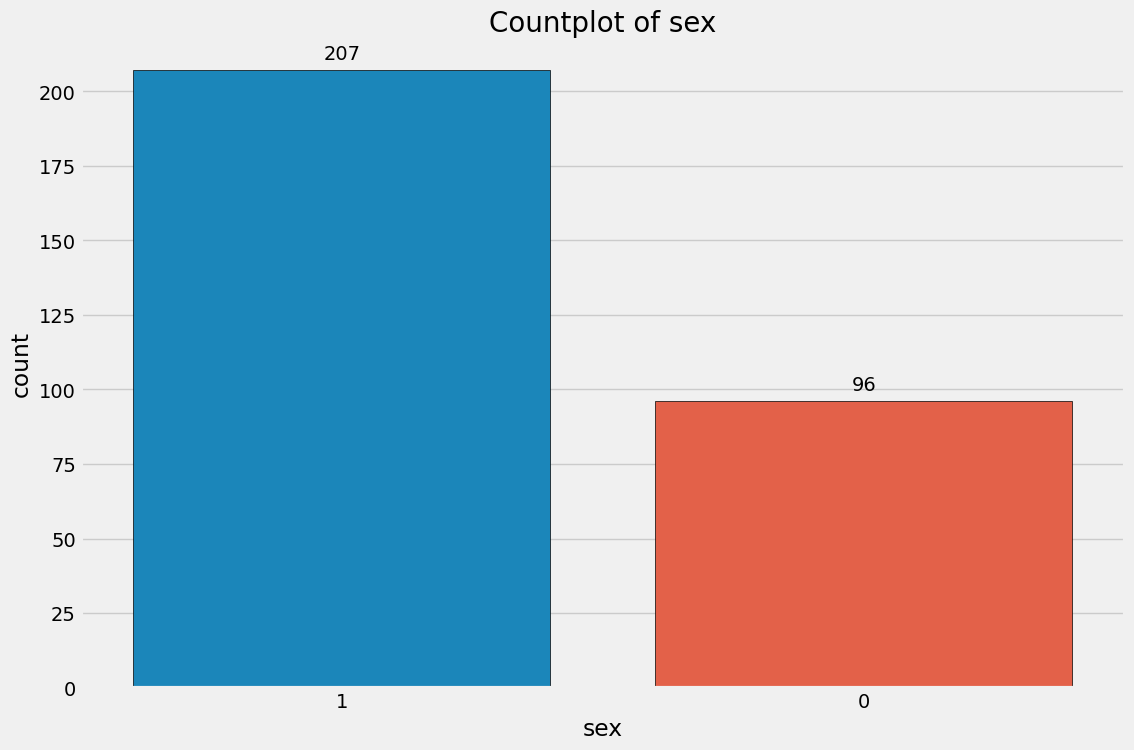

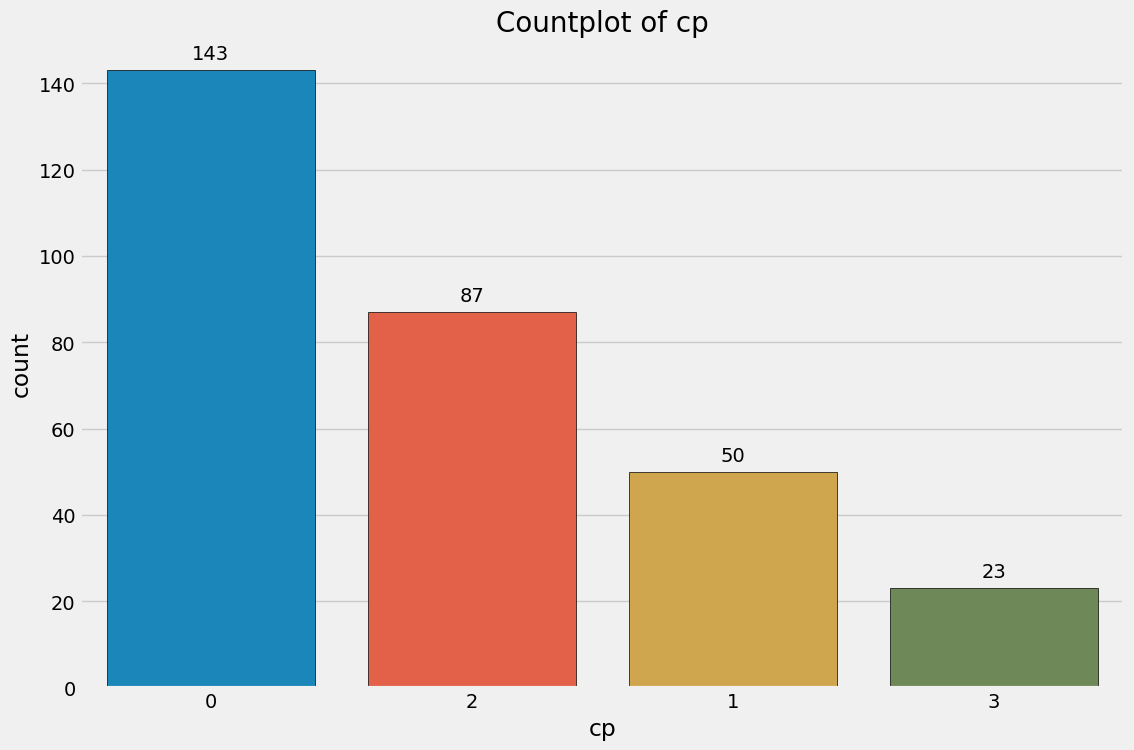

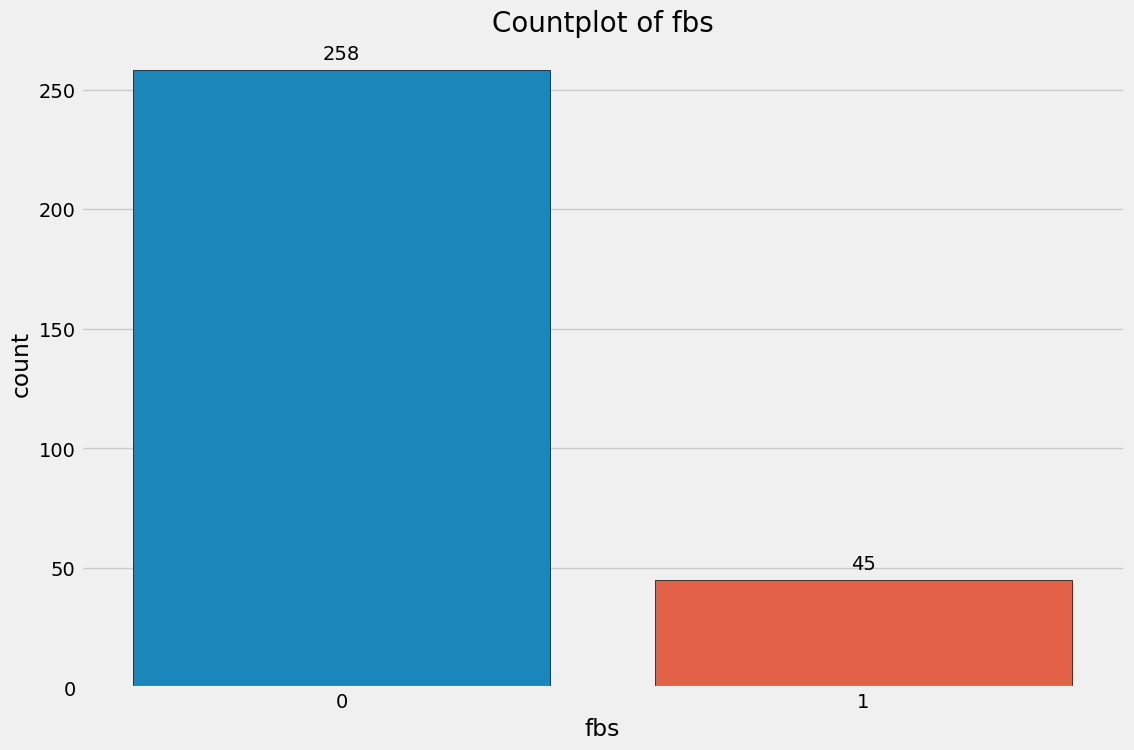

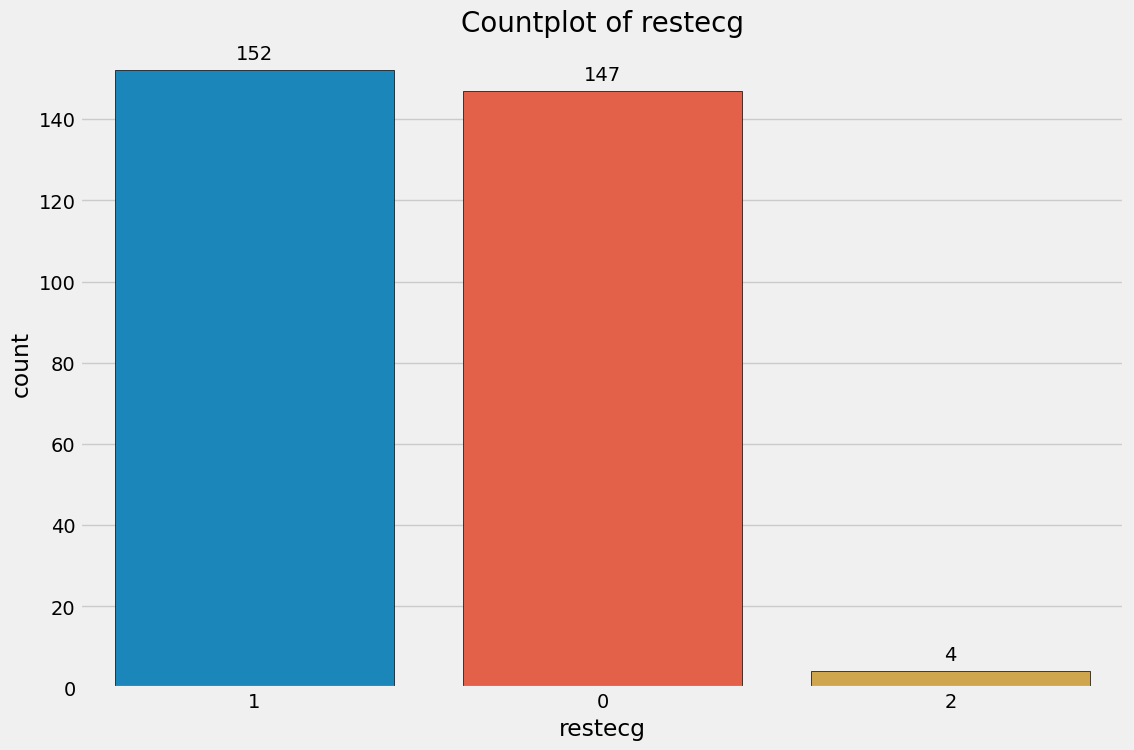

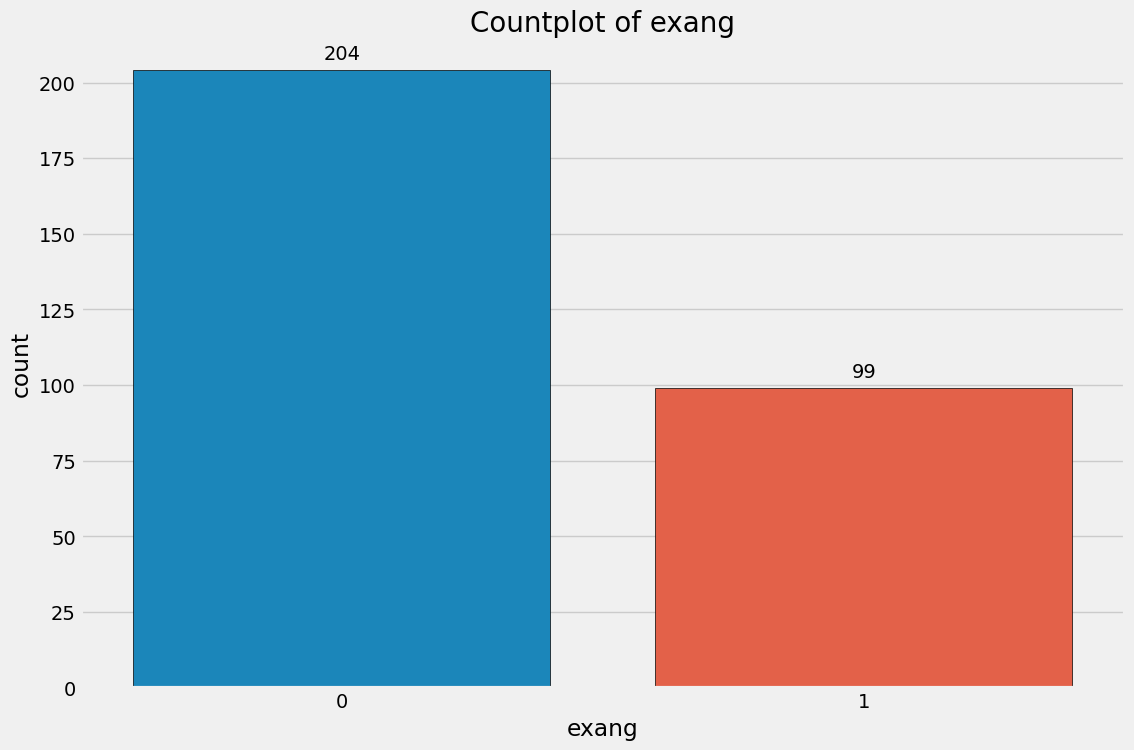

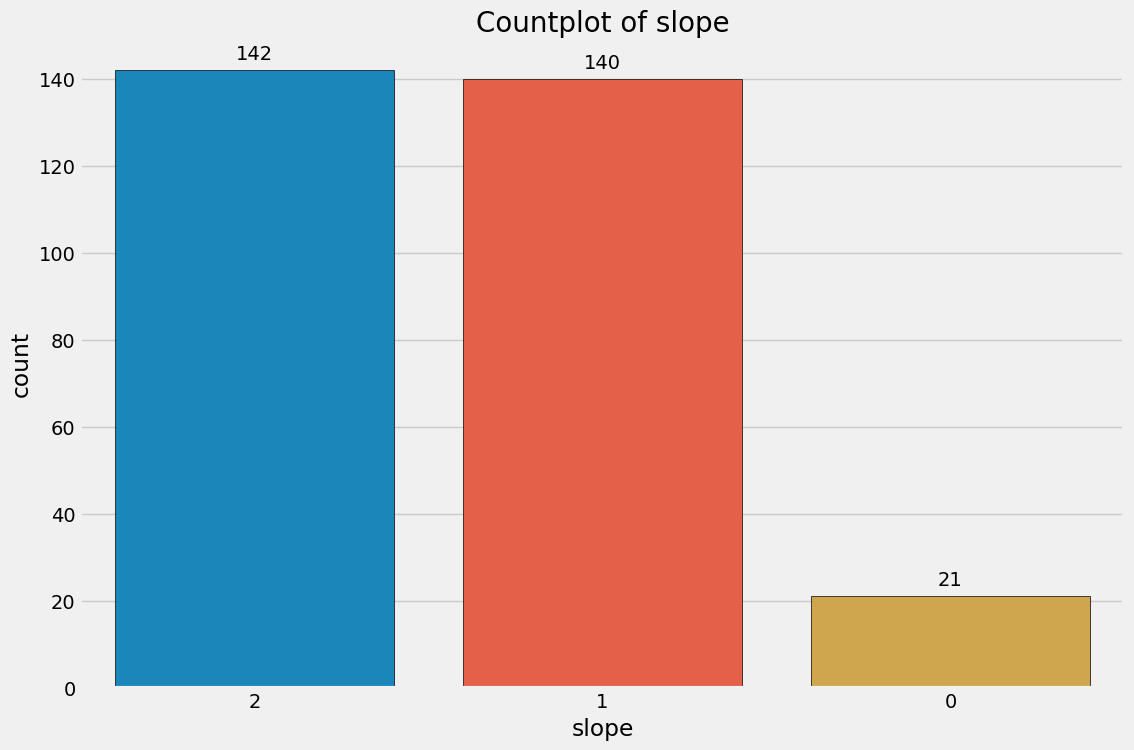

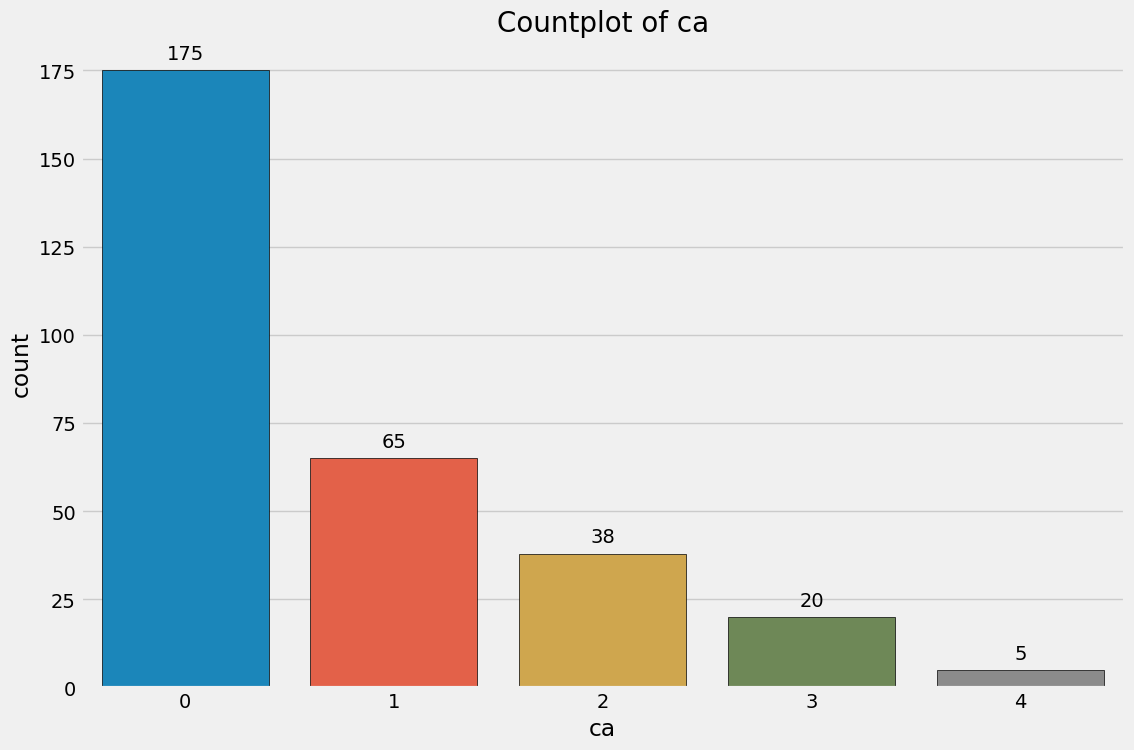

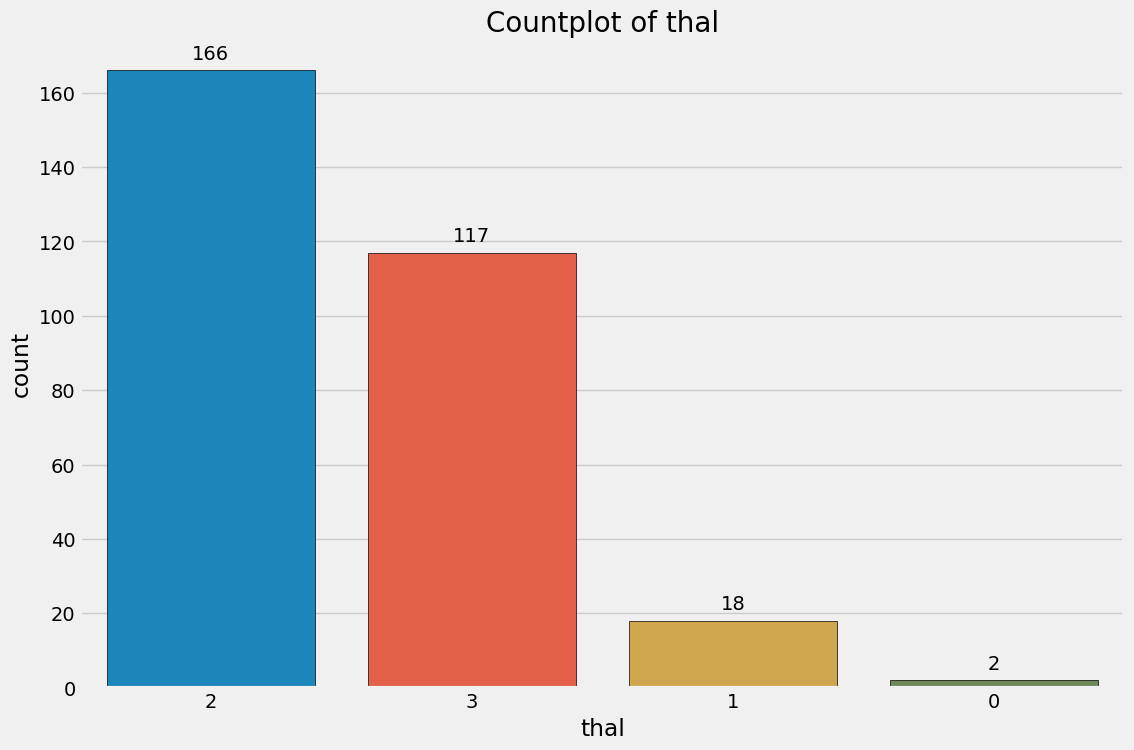

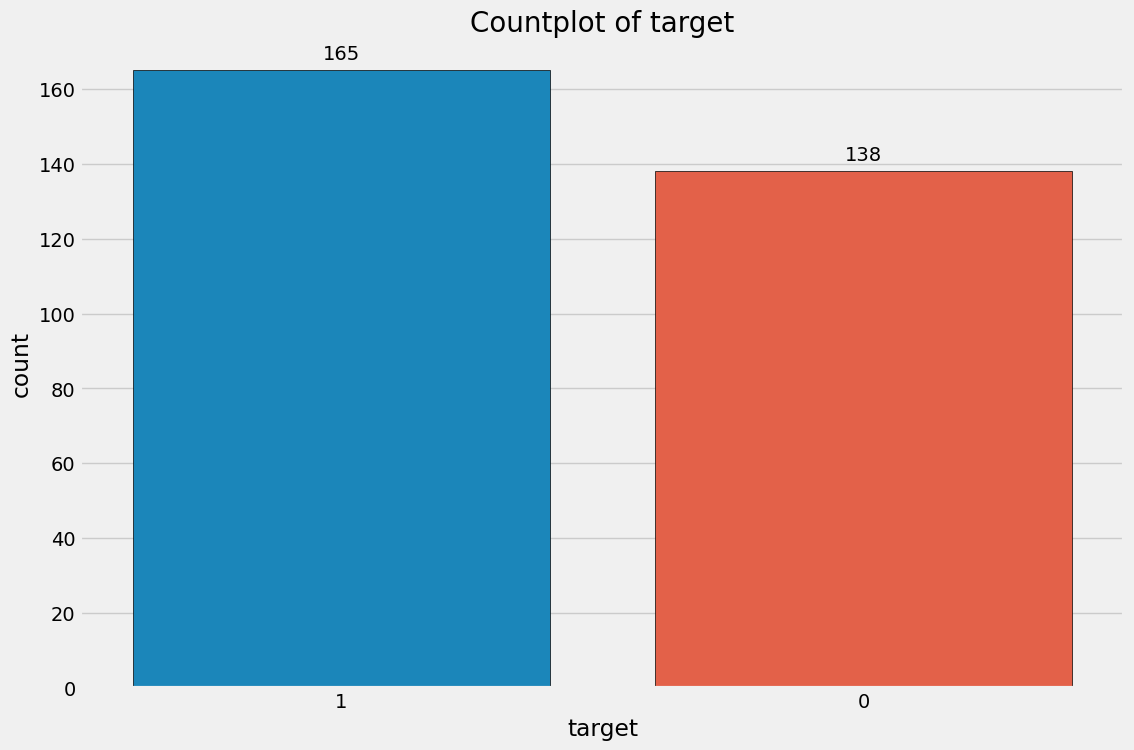

In [20]:
fast_eda(data)

In [21]:
X = data.drop('target', axis=1)
y = data['target']

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# Prepare data for modelling

In [24]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Models
1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest Classifier


In [26]:
# Put models in a dictionary
models = {
    'LR': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'RFC': RandomForestClassifier()
}

# Create function to fit and score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    np.random.seed(42)

    # make a dictionary to keep models' scores
    scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = {
            'train': model.score(X_train, y_train),
            'test': model.score(X_test, y_test)
        }

    return scores

In [27]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
model_scores

{'LR': {'train': 0.8553719008264463, 'test': 0.8852459016393442},
 'KNN': {'train': 0.7603305785123967, 'test': 0.6885245901639344},
 'RFC': {'train': 1.0, 'test': 0.8360655737704918}}

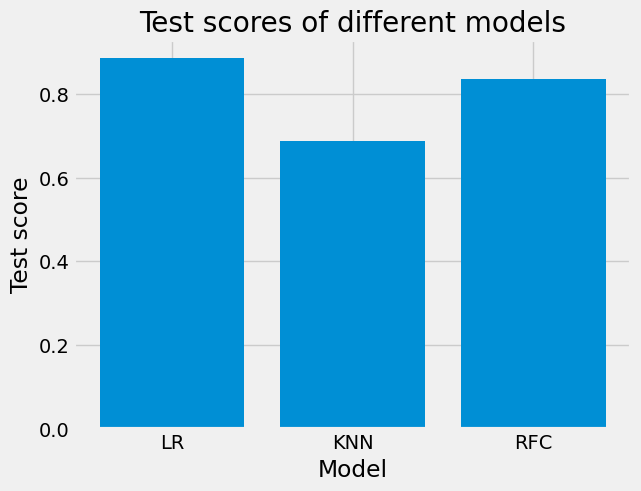

In [29]:
# Compare different test models
plt.bar(model_scores.keys(), [score['test'] for score in model_scores.values()])
plt.xlabel('Model')
plt.ylabel('Test score')
plt.title('Test scores of different models')
plt.show()

# Feature elimination

In [30]:
X = data.drop(columns=less_corr_col, axis=1).drop('target', axis=1)
y = data['target']

In [31]:
X

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,150,0,2.3,0,0,1
1,37,1,2,187,0,3.5,0,0,2
2,41,0,1,172,0,1.4,2,0,2
3,56,1,1,178,0,0.8,2,0,2
4,57,0,0,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...
298,57,0,0,123,1,0.2,1,0,3
299,45,1,3,132,0,1.2,1,0,3
300,68,1,0,141,0,3.4,1,2,3
301,57,1,0,115,1,1.2,1,1,3


In [32]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': {'train': 0.8471074380165289, 'test': 0.8852459016393442},
 'KNN': {'train': 0.78099173553719, 'test': 0.639344262295082},
 'RFC': {'train': 1.0, 'test': 0.8360655737704918}}

### Scores after removing features: ['trestbps', 'chol', 'fbs', 'restecg'] doesn't change for LogisticRegression and RandomForestClassifier. So, these features can be eliminated.

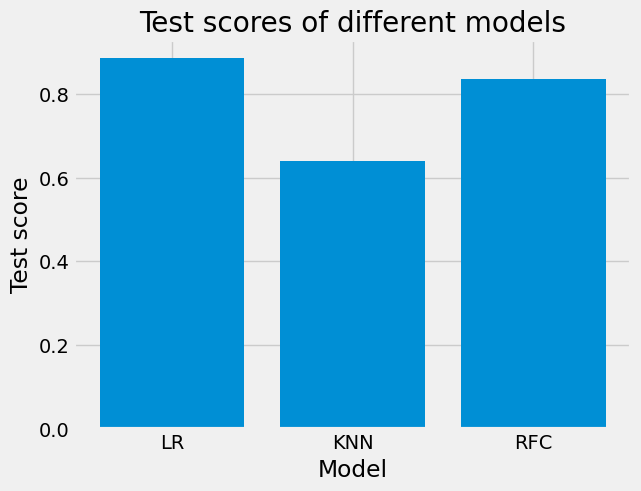

In [34]:
plt.bar(model_scores.keys(), [score['test'] for score in model_scores.values()])
plt.xlabel('Model')
plt.ylabel('Test score')
plt.title('Test scores of different models')
plt.show()

# Hyperparameter Tuning KNN

In [35]:
train_scores = []
test_scores = []

neighbors = range(1, 31)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Max score on test data: 0.74


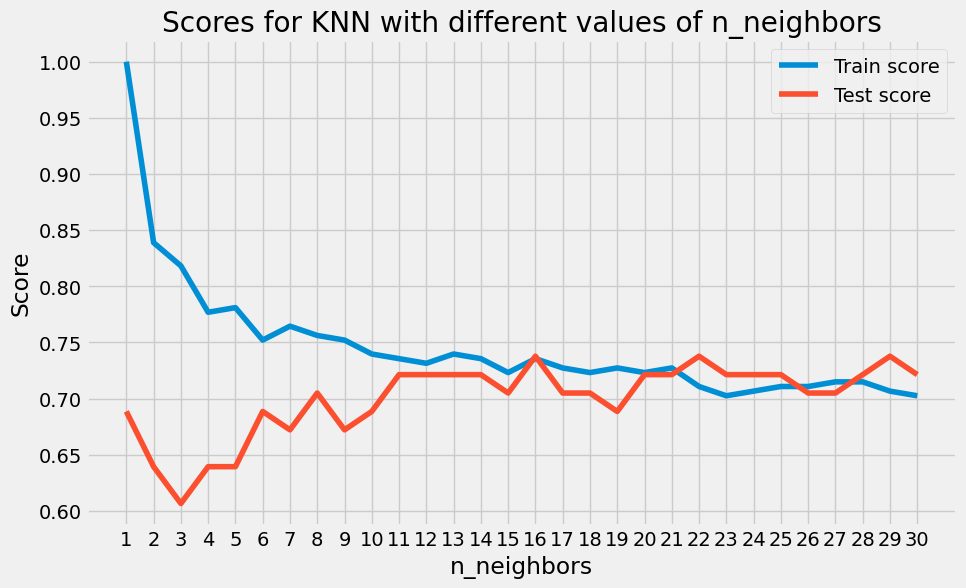

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.xticks(np.arange(1, 31, 1))
plt.title('Scores for KNN with different values of n_neighbors')
plt.legend()

print(f'Max score on test data: {round(max(test_scores), 2)}')

### Even after hyperparameter tuning, KNN model can't compete with other two models. So, further exploration in KNN is pointless.

# Hyperparameter Tuning by RandomizedSearchCV for LogisticRegression and RandomForestClassifier

In [37]:
# Hyperparameter grid for LR
LR_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}


# Hyperparameter grid for RFC
RFC_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': np.arange(0, 31, 5),
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
}

In [38]:
# For Logistic Regression
np.random.seed(42)

randomized_search_LR = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=LR_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

randomized_search_LR.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
randomized_search_LR.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [40]:
randomized_search_LR.score(X_test, y_test)

0.8852459016393442

In [41]:
# For RandomForestClassifier
np.random.seed(42)

randomized_search_RFC = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=RFC_grid,
    cv=5,
    n_iter=100,
    verbose=True
)

randomized_search_RFC.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': array([ 0,  5, 10, 15, 20, 25, 30]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
randomized_search_RFC.best_params_

{'n_estimators': 160,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [43]:
randomized_search_RFC.score(X_test, y_test)

0.8688524590163934

 ### Hyperparameter tuning on RFC is still scoring less than the Logistic Regression

In [44]:
# Improving Logistic Regression Model
log_reg_grid = {
    'C': np.logspace(-4, 4, 30),
    'solver': ['liblinear']
}

gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [46]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

# Evaluating our ML classifier beyond accuracy:
1. ROC curve and AUC score
2. Confusion matrix
3. Classification report
4. Precision
5. Recall
6. F1-score

In [47]:
# Make predictions
y_preds = gs_log_reg.predict(X_test)

In [48]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

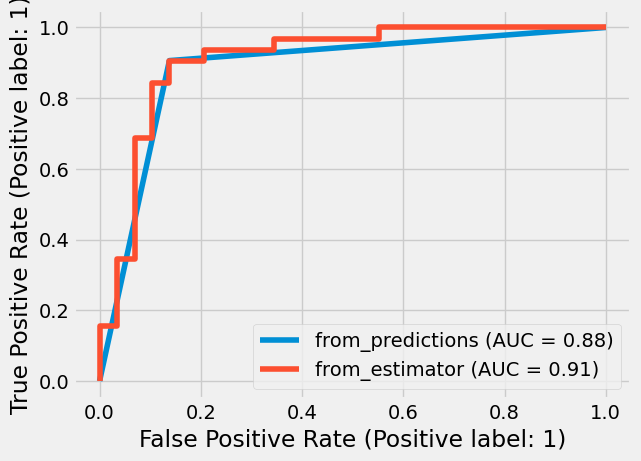

In [49]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, y_preds, ax=ax, name='from_predictions')
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test, ax=ax, name='from_estimator')

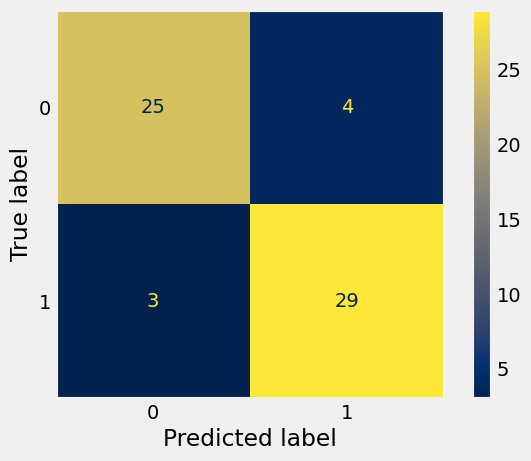

In [50]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap=plt.cm.cividis)

# remove grid lines
plt.grid(False)

In [51]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [52]:
# Cross validated accuracy
cv_acc = cross_val_score(gs_log_reg, X, y, cv=5, scoring='accuracy')
cv_acc.mean()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8546994535519126

In [53]:
# Cross validated precision
cv_precision = cross_val_score(gs_log_reg, X, y, cv=5, scoring='precision')
cv_precision.mean()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8363682501917795

In [54]:
# Cross validated recall
cv_recall = cross_val_score(gs_log_reg, X, y, cv=5, scoring='recall')
cv_recall.mean()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.9212121212121213

In [ ]:
# Cross validated f1
cv_f1 = cross_val_score(gs_log_reg, X, y, cv=5, scoring='f1')
cv_f1.mean()

<Axes: title={'center': 'Cross validated classification metrics'}>

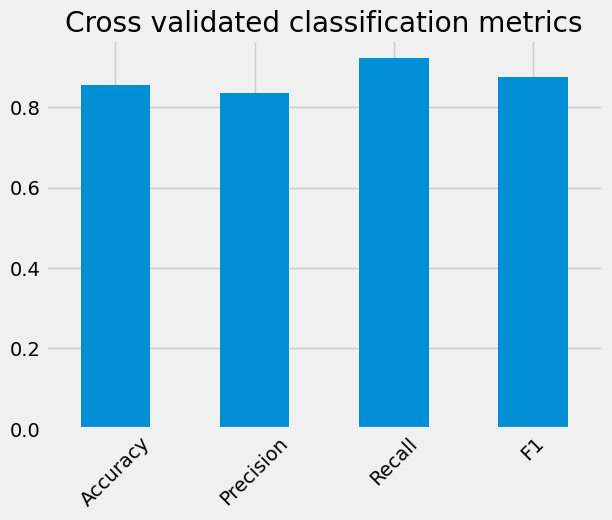

In [56]:
# Visulaize cross-validated metrics
cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc.mean(),
    'Precision': cv_precision.mean(),
    'Recall': cv_recall.mean(),
    'F1': cv_f1.mean()
}, index=[0])

cv_metrics.T.plot.bar(title='Cross validated classification metrics', legend=False, rot=45)

# Feature Importance

In [ ]:
data.head()

In [ ]:
gs_log_reg.best_params_

In [59]:
clf = LogisticRegression(C=0.7278953843983146, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.7278953843983146, solver='liblinear')

In [60]:
# check coef
clf.coef_

array([[-0.00967943, -1.19416244,  0.75222363,  0.0197414 , -0.87787115,
        -0.63469739,  0.59257702, -0.71769686, -0.80912474]])

In [61]:
# Match coef's of features to columns
feature_dict = dict(zip(X.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.009679427724613655,
 'sex': -1.194162436206041,
 'cp': 0.7522236260971538,
 'thalach': 0.019741403772419473,
 'exang': -0.8778711450080566,
 'oldpeak': -0.6346973858133522,
 'slope': 0.5925770152664044,
 'ca': -0.7176968567809561,
 'thal': -0.8091247401177775}

<Axes: title={'center': 'Feature Importance'}>

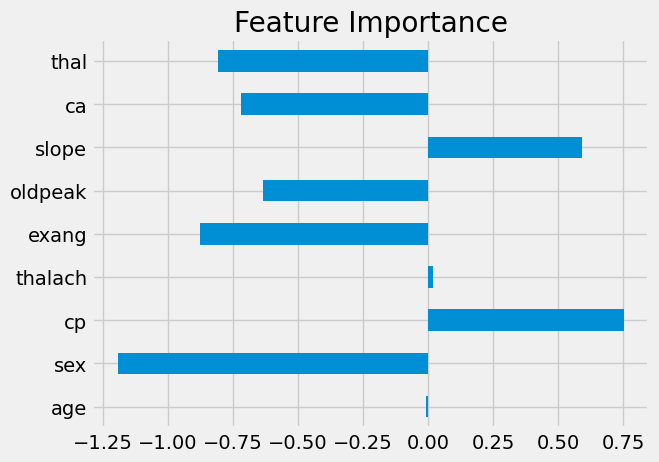

In [62]:
# Visualize feature immportance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.barh(title='Feature Importance', legend=False)